# Seaborn
## 🚩 Goals
1. Build variations of Matplotlib charts like Bar Chart, Histogram, Boxplot, Violin Plot, Linear Relation
2. Create FacetGrid layouts as an alternative to subplots
3. Integrate Seaborn with Matplotlib objects to get the best
## 🎯 정의
- Python Library for easily visualizing Pandas DataFrames
    - 데이터프레임을 자동으로 집계

In [1]:
import seaborn as sns
import pandas as pd

## 1. Chart Formatting
- Matplotlib의 매개변수를 사용하면 Seaborn 차트를 커스터마이징할 수 있다
    - Seaborn만의 포맷 함수 ex. despine

In [2]:
housing_raw = pd.read_csv(
    './data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)

ca_housing = (
    housing_raw
    .loc[housing_raw['region_name'].str.contains('CA')]
    .assign(
        region_name=housing_raw['region_name'].str[0:-11]
    )
)

ca_housing_pivot = (
    ca_housing
    .pivot_table(
        index='period_begin',
        columns='region_name',
        values='median_active_list_price'
    )
    .loc[
        :,
        ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']
    ]
    .assign(
        overall_avg=lambda x: x.mean(axis=1)
    )
)
ca_housing_pivot.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


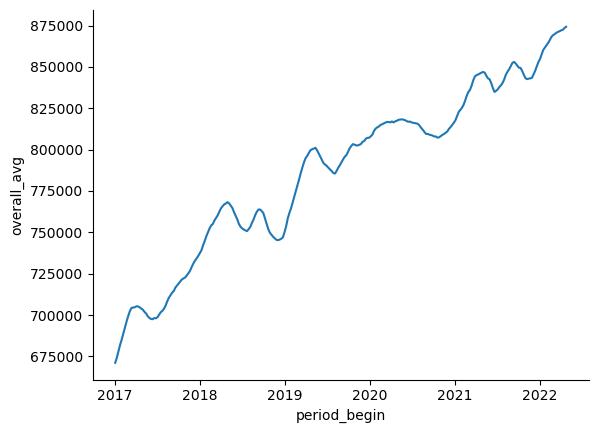

In [3]:
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index,
    y='overall_avg'
)

sns.despine()

In [4]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


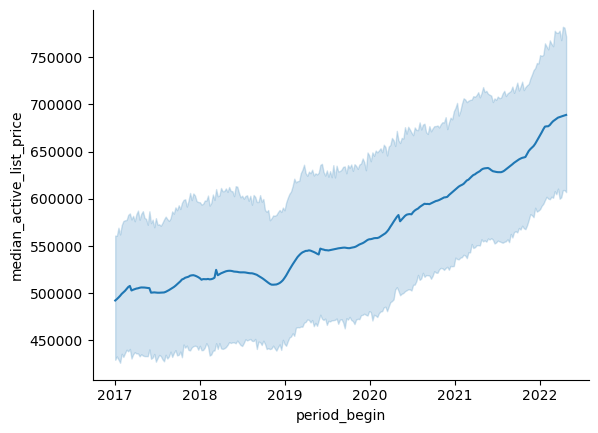

In [5]:
sns.lineplot(
    data=ca_housing,
    x='period_begin',
    y='median_active_list_price'
)

sns.despine()

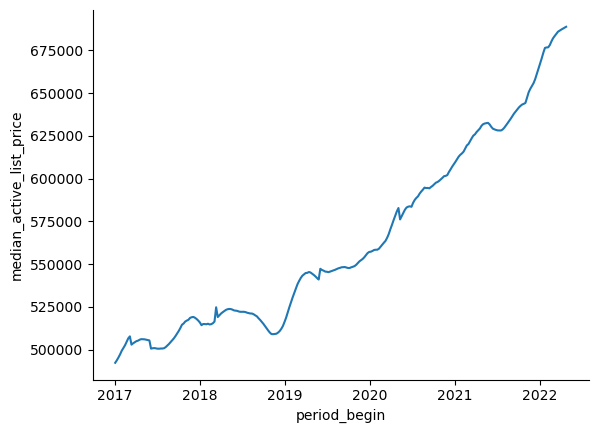

In [6]:
sns.lineplot(
    data=ca_housing,
    x='period_begin',
    y='median_active_list_price',
    errorbar=None
)

sns.despine()

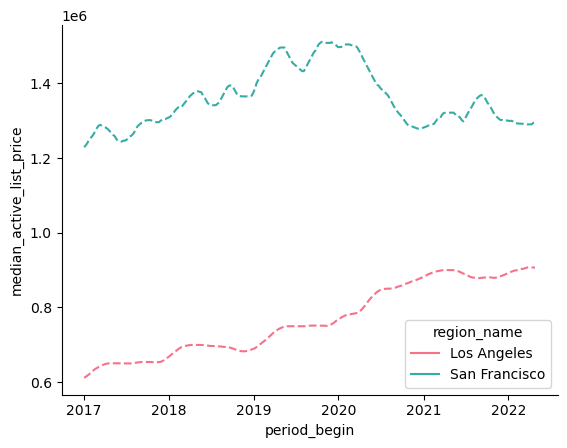

In [7]:
sns.lineplot(
    data=ca_housing.query("region_name in ['Los Angeles', 'San Francisco']"),
    x='period_begin',
    y='median_active_list_price',
    errorbar=None,
    hue='region_name',
    ls='--',
    palette='husl'
)

sns.despine()

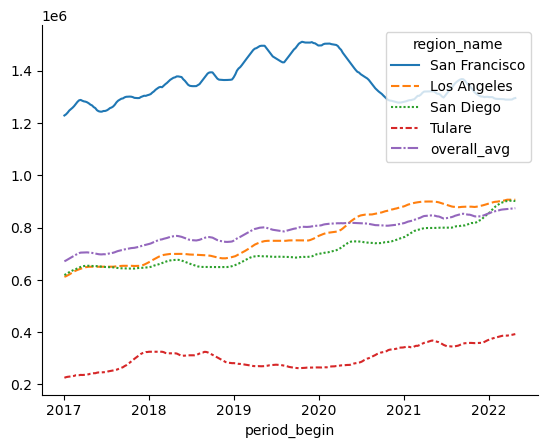

In [8]:
# 개인적으로 matplotlib을 사용해서 Line Plot 그리는 것을 선호
sns.lineplot(
    data=ca_housing_pivot
)

sns.despine()

## 2. Bar Chart
- Automatically aggregates the data for the plot
    - unique category values as the labels for each bar,
    - mean of each category for bar length

In [9]:
diamonds = pd.read_csv('./data/Diamonds Prices2022.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


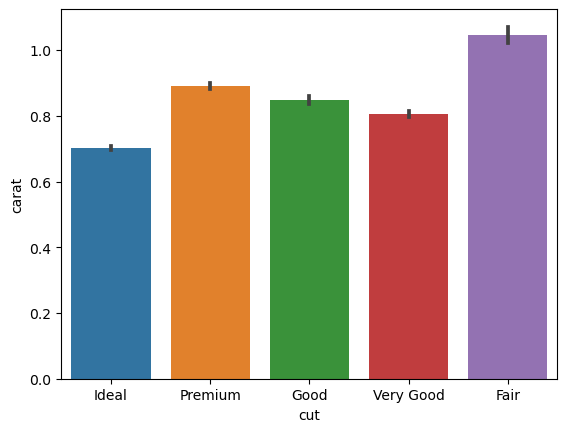

In [10]:
sns.barplot(
    x='cut', y='carat',
    data=diamonds
);

### > Horizontal Bar Chart
- x와 y 바꿔서 입력 (범주형 데이터가 base 역할)
    - ex) 범주형 데이터를 y에 입력하면 horizontal bar chart 그릴 수 있음

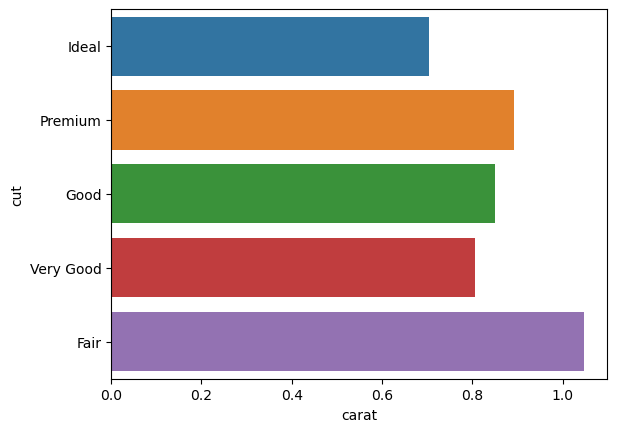

In [11]:
sns.barplot(
    x='carat', y='cut', data=diamonds, errorbar=None
);

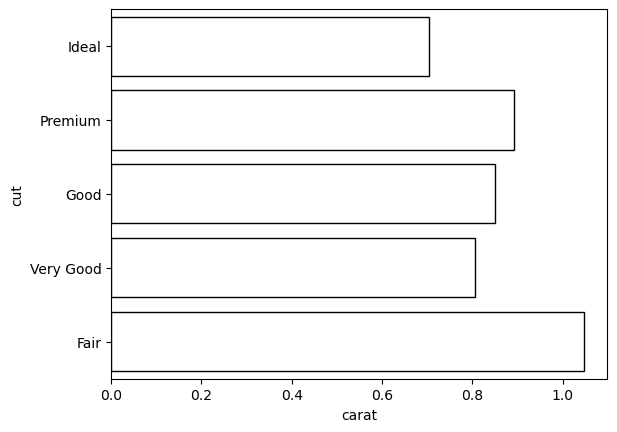

In [12]:
sns.barplot(
    x='carat', y='cut', data=diamonds,
    errorbar=None, facecolor='white', edgecolor='black'
);

### > Grouped Bar Chart
- seaborn으로 구현하는 편이 더 간단
- 매개변수 hue 사용

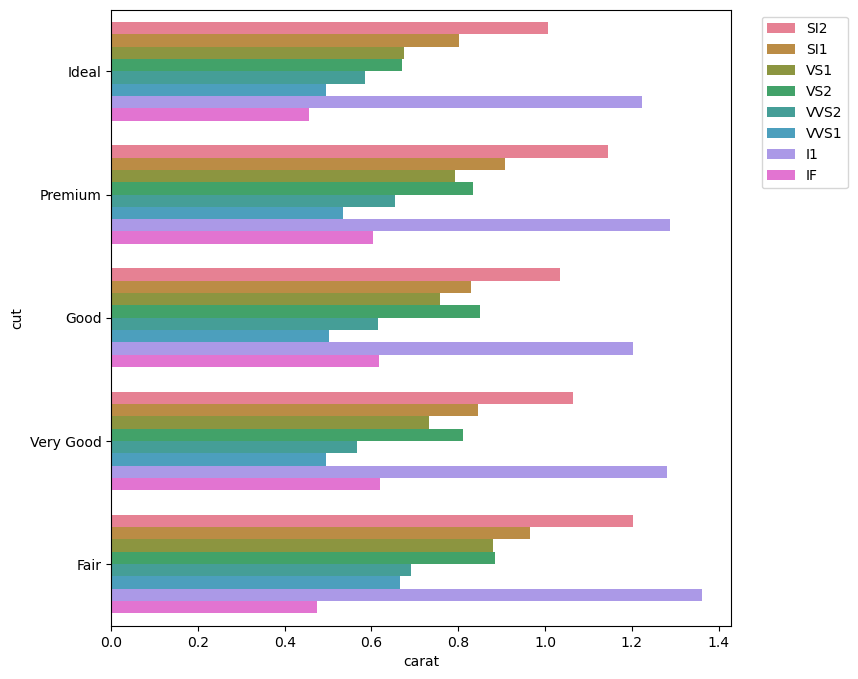

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(
    x='carat', y='cut', data=diamonds, hue='clarity', palette='husl', errorbar=None
)

ax.legend(bbox_to_anchor=(1.2, 1));

## 3. Histogram
https://seaborn.pydata.org/generated/seaborn.histplot.html

In [14]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


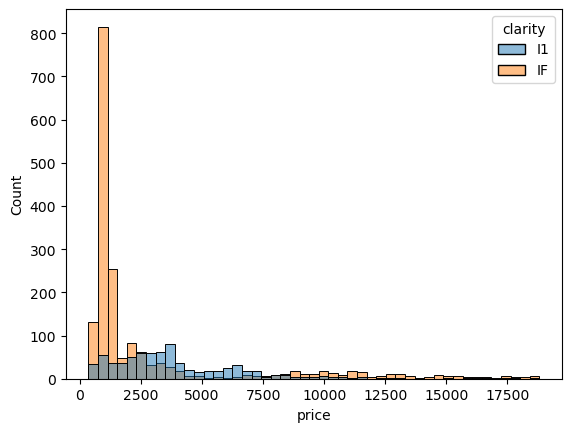

In [15]:
# alpha 매개변수 자동으로 조정
sns.histplot(
    x='price',
    hue='clarity',
    data=diamonds.query("clarity in ['I1', 'IF']")
);

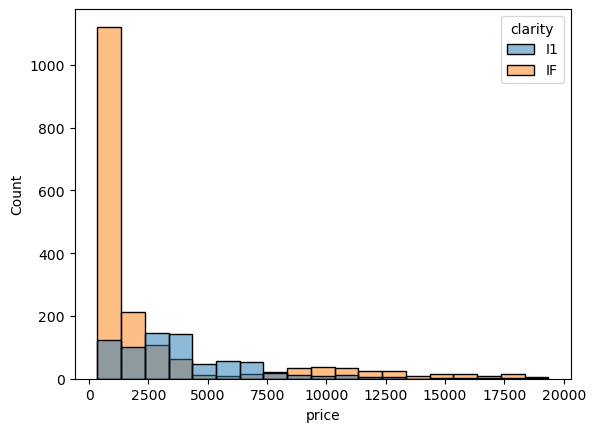

In [16]:
# x축 범위와 binwidth 사이의 관계
sns.histplot(
    x='price',
    hue='clarity',
    data=diamonds.query("clarity in ['I1', 'IF']"),
    binwidth=1000
);

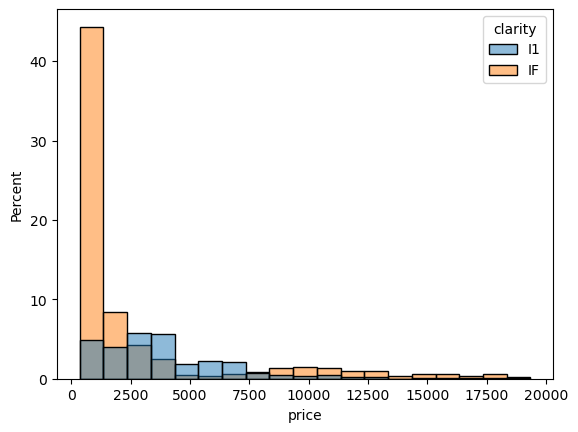

In [17]:
# stat 매개변수를 통해 비율 확인 가능
sns.histplot(
    x='price',
    hue='clarity',
    data=diamonds.query("clarity in ['I1', 'IF']"),
    binwidth=1000,
    stat='percent'
);

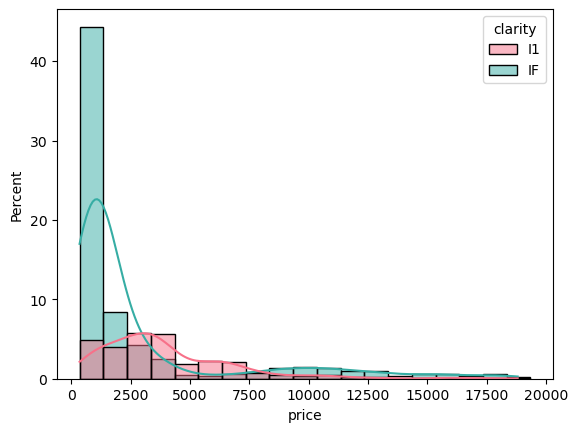

In [18]:
sns.histplot(
    x='price',
    hue='clarity',
    data=diamonds.query("clarity in ['I1', 'IF']"),
    binwidth=1000,
    stat='percent',
    palette='husl',
    kde=True
);

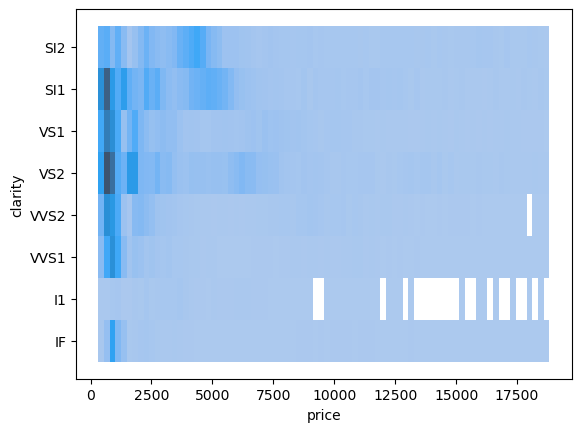

In [19]:
# density plot 같이 사용 가능
sns.histplot(
    x='price',
    y='clarity',
    data=diamonds
);

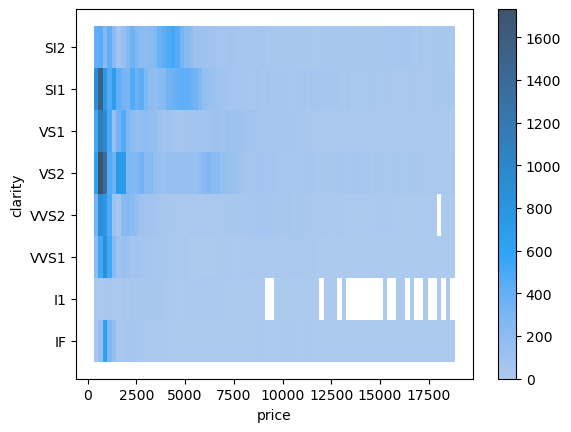

In [20]:
# cbar 매개변수 (컬러바)
sns.histplot(
    x='price',
    y='clarity',
    data=diamonds,
    cbar=True
);

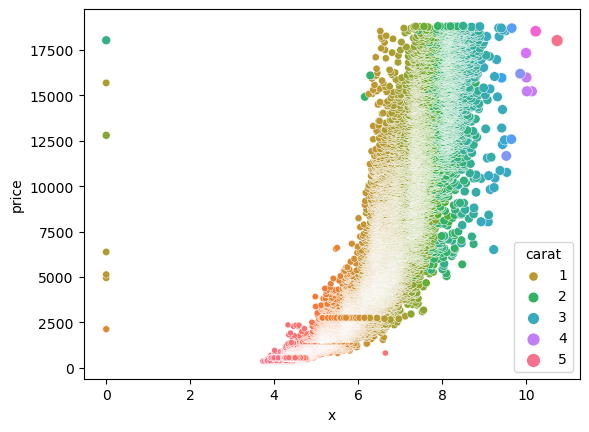

In [21]:
# Scatter Plot
sns.scatterplot(
    x='x',
    y='price',
    data=diamonds,
    hue='carat',
    palette='husl',
    size='carat'
);